# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
mount_point = '/content/drive'
drive.mount(mount_point)

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import pandas as pd
import numpy as np

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# Display first 10 records of song_df data
song_df.head(10)


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:In the count_df there are 2,000,000 entries. 2 data types, object and int64. 4 columns being: unnamed, user_id, song_id and play_count.
In the song_df there are 1,000,000 entries. 2 data types, being, object and int64. 5 columns, song_id, title, realease, artist_name and year. title is missing 17 values and release is missing 7 values.

In [8]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on='song_id', how='left')
# Drop the column 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])
## Name the obtained dataframe as "df"
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 106.8+ MB


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [9]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder
columns = ['user_id', 'song_id']
df[columns] = df[columns].apply(LabelEncoder().fit_transform)
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [10]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [11]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [12]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [13]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [14]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [15]:
# Check the shape of the data
df_final.shape


(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [16]:
# Display total number of unique user_id
unique_user = df_final['user_id'].nunique()
print(f"Total number of unique user_id: {unique_user}")

Total number of unique user_id: 3155


Total number of unique song id

In [17]:
# Display total number of unique song_id
unique_song = df_final['song_id'].nunique()
print(f"Total number of unique song_id: {unique_song}")

Total number of unique song_id: 563


Total number of unique artists

In [18]:
# Display total number of unique artists
unique_artist = df_final['artist_name'].nunique()
print(f"Total number of unique artists: {unique_artist}")

Total number of unique artists: 232


#### **Observations and Insights: There are 3,155 differentr users, 563 different songs and 232 different artists in the dataframe.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [19]:
song_interactions = df_final.groupby('title').size().reset_index(name='interactions')
most_interacted_songs = song_interactions.sort_values(by='interactions', ascending=False)
print("Top 10 most interacted songs:")
most_interacted_songs.head(10)

Top 10 most interacted songs:


,title,interactions
510,Use Somebody,751
105,Dog Days Are Over (Radio Edit),748
391,Sehr kosmisch,713
80,Clocks,662
473,The Scientist,652
390,Secrets,618
140,Fireflies,609
92,Creep (Explicit),606
550,Yellow,583
185,Hey_ Soul Sister,570


Most interacted users

In [20]:
user_interactions = df_final.groupby('user_id').size().reset_index(name='play_count')
most_interacted_users = user_interactions.sort_values(by='play_count', ascending=False)
print('Top 10 most interacted users:')
most_interacted_users.head(10)

Top 10 most interacted users:


,user_id,play_count
2547,61472,243
661,15733,227
1561,37049,202
398,9570,184
964,23337,177
440,10763,176
376,9097,175
1106,26616,175
1791,43041,174
2715,65994,171


#### **Observations and Insights: The song with the most interactions is Use Somebody, with 751 interactions, the second was only 3 behind at 748 interactions. The tenth most interactions was at 570. That is a pretty big difference from the most.
The user with the most play count was at 243 plays and the tenth most plays was at 171, which again, is quite a difference.


Songs released on yearly basis

In [21]:
# Find out the number of songs released in a year, use the songs_df
# Hint: Use groupby function on the 'year' column
songs_per_year = song_df.groupby('year').size().reset_index(name='song_count')
print("Number of songs released in each year:")
songs_per_year.tail(10)

Number of songs released in each year:


,year,song_count
80,2002,23472
81,2003,27389
82,2004,29618
83,2005,34960
84,2006,37546
85,2007,39414
86,2008,34770
87,2009,31051
88,2010,9397
89,2011,1


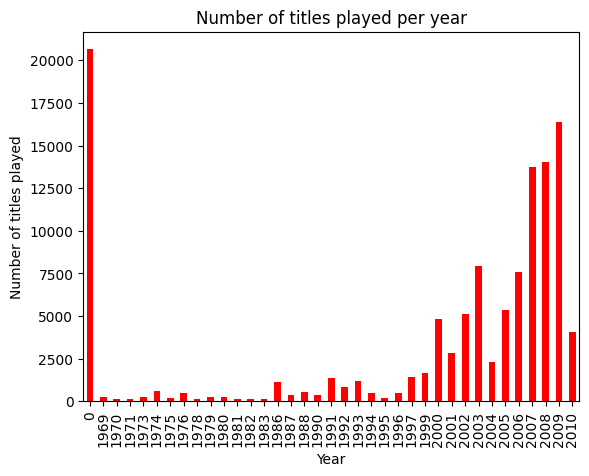

<Figure size 1000x600 with 0 Axes>

In [22]:
# Create a barplot, using the df_final dataframe as using the song_df is very messy and too much data to read
# set x and y label
songs_per_year = df_final.groupby('year').size()
songs_per_year.plot(kind='bar', color= 'red')
plt.xlabel('Year')
plt.ylabel('Number of titles played')
plt.title('Number of titles played per year')
# Set the figure size
plt.figure(figsize=(10,6))
# Show the plot
plt.show()

#### **Observations and Insights: Year zero has quite a few Titles played per year because it contains all the Titles played prior to 1969. As the years progress we see a jump in titles being played, most likely due to the emergence of and accessibility of the internet and streaming platforms. 2010 looks to be smaller because this data could have possibly been obtained in the middle of the year 2010.

> Add blockquote



**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [23]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_play_count = df_final.groupby('song_id')['play_count'].mean()
# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
frequency_played = df_final.groupby('song_id')['play_count'].count()


In [24]:
# Making a dataframe with the average_count and play_freq
play_final = pd.DataFrame({'average_play_count': average_play_count, 'frequency_played' : frequency_played})
play_final = play_final.sort_values(by = 'average_play_count', ascending = False)
# Let us see the first five records of the final_play dataset
play_final.head()

,average_play_count,frequency_played
song_id,,
7224,3.373832,107
8324,2.625000,96
6450,2.578431,102
9942,2.486667,150
5531,2.309061,618


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [25]:
# Build the function to find top n songs
def top_n_songs(data, n):
    """
    Function to find top n songs based on play count

    Parameters:
    data: the dataframe containing the data
    n: the number of songs to return

    Returns:
    A dataframe with the top n songs based on play count
    """
    song_play_count = data.groupby('title')['play_count'].sum().reset_index()
    top_n_songs = song_play_count.sort_values(by='play_count', ascending=False).head(n)

    return top_n_songs




In [26]:
# Recommend top 10 songs using the function defined above
top_10_songs = top_n_songs(df_final, 10)
print("Top 10 songs based on play count:")
print(top_10_songs)

Top 10 songs based on play count:
                              title  play_count
105  Dog Days Are Over (Radio Edit)        1634
391                   Sehr kosmisch        1583
510                    Use Somebody        1463
390                         Secrets        1427
140                       Fireflies        1291
473                   The Scientist        1259
185                Hey_ Soul Sister        1208
80                           Clocks        1203
331                             OMG        1126
92                 Creep (Explicit)        1067


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [27]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise
# !pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357277 sha256=e583565b7232f1af65e9a9327217df6d5e715b7b6df49c0f2688b7ac2b6563d5
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [28]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [29]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [30]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0,5))
# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

**Think About It:** How changing the test size would change the results and outputs?

In [31]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
predict_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)
# Train the algorithm on the trainset, and predict play_count for the testset
predict_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(predict_user_user, k=30, threshold=1.5)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights: rmse is about 1.087, which tells us how accurate our model's predictions are. The lower, the better. The precision here is about 0.396 which means around 40% of songs recommended are useful, or relevant to the user. Recall is at around 0.692, so around 69% of the actual relevant or useful songs are indeed recommended to the user. F_1 comes in at around 0.504. This tells us the accuracy of our model. The balance between or Precision and Recall is moderate, so somewhat accurate but has room for improvement.

In [32]:
# Predicting play_count for a sample user with a listened song
users_that_played_5531 = df_final[df_final['song_id'] == 5531]['user_id'].unique().tolist()
print("song_id:", 5531)
print("users who have played 5531:", users_that_played_5531)
user_actual_play = df_final[(df_final['user_id'] == 4522) & (df_final['song_id'] == 5531)]
actual_play_count = user_actual_play['play_count'].sum()
print(f" User has listened to song {actual_play_count} times")
# Use any user id  and song_id
sample_user = '4522'
sample_song = '5531'
predict_user_user.predict(4522, 5531, verbose = True)

song_id: 5531
users who have played 5531: [57932, 34225, 22749, 37938, 40549, 19193, 35091, 74334, 4522, 23297, 1210, 26149, 6901, 56230, 47806, 42808, 35737, 72757, 25422, 154, 26071, 67675, 42453, 48469, 50246, 12888, 330, 35600, 36805, 69933, 72805, 51011, 63105, 29857, 32646, 26464, 26897, 51934, 24210, 43806, 30028, 33279, 53547, 31721, 37400, 7389, 32490, 52079, 60754, 65067, 35118, 5016, 74276, 25577, 72117, 72449, 62297, 72482, 57152, 2078, 72372, 66017, 52655, 72221, 169, 34466, 68791, 39230, 69175, 73432, 1965, 19106, 16249, 58127, 70189, 17197, 71942, 6689, 71085, 26707, 52796, 21220, 47203, 61160, 35025, 45365, 53091, 47081, 56367, 39208, 48498, 44643, 68368, 28201, 37017, 11797, 38051, 39330, 22250, 55173, 30305, 60247, 32871, 65994, 59163, 2397, 25409, 32364, 64613, 8444, 49418, 30384, 45545, 1140, 76014, 23871, 19406, 46292, 21730, 22802, 70386, 46859, 69695, 23358, 29412, 43604, 33422, 63017, 7652, 9262, 60168, 20505, 23705, 31503, 49897, 905, 52985, 49702, 55199, 72651

Prediction(uid=4522, iid=5531, r_ui=None, est=1.8242484644689951, details={'actual_k': 40, 'was_impossible': False})

In [33]:
# Predicting play_count for a sample user with a song not-listened by the user
all_users = df_final['user_id'].unique()
users_that_did_not_play_5531 = set(all_users) - set(users_that_played_5531)
print("song_id:", 5531)
print("users that have not played 5531:", users_that_did_not_play_5531)
 #predict play_count for any sample user
sample_user = '8199'
sample_song = '5531'
predict_user_user.predict(8199, 5531, verbose = True)

song_id: 5531
users that have not played 5531: {8194, 49157, 32773, 8199, 11, 49164, 24589, 73748, 32791, 16409, 16412, 40989, 57374, 73771, 24622, 16435, 57396, 65590, 73783, 57, 32827, 57408, 16450, 8265, 41041, 8275, 8279, 16480, 32867, 32868, 24678, 65641, 16500, 120, 32890, 73854, 24706, 8322, 49283, 57478, 65670, 16523, 41100, 8338, 57491, 24727, 57495, 24730, 156, 16547, 24740, 16549, 57510, 8361, 24745, 8366, 65719, 24760, 24765, 49343, 32961, 57538, 41155, 24777, 41163, 8401, 49364, 41179, 8411, 73949, 226, 24803, 8428, 24813, 8429, 73972, 33017, 73981, 41214, 24846, 65807, 65809, 16660, 41236, 41237, 49434, 33051, 8478, 57634, 41251, 57638, 33067, 301, 74032, 24883, 41274, 49468, 74056, 8524, 333, 65873, 16723, 49493, 33113, 41306, 57694, 24929, 41315, 49507, 24936, 65900, 33145, 387, 41350, 33164, 49549, 74126, 8591, 74130, 49554, 24980, 49556, 406, 16790, 8606, 16799, 421, 19623, 8618, 41389, 41391, 65970, 41399, 447, 33217, 8646, 33222, 457, 33227, 469, 8661, 16854, 57815,

Prediction(uid=8199, iid=5531, r_ui=None, est=2.525, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights: Sample user 4522 actually listened to song 5531 2 times. Our model predicted that they would listen to it 1.82 times. This is close, but not hitting our correct number. Perhaps with some tweaking of the model we can do better.
Now for a listener 8199, that has not listened to song 5531, this model predicted that they would listen to the song 2.52 times.

Now, let's try to tune the model and see if we can improve the model performance.

In [34]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                       'user_based': [True]}}
# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)
# Best RMSE score
print(f"Best Score: {gs.best_score['rmse']}")
# Combination of parameters that gave the best RMSE score
print(f"Best Parameters Score: {gs.best_params['rmse']}")

Best Score: 1.059496776495833
Best Parameters Score: {'k': 40, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


In [35]:
# Train the best model found in above gridsearch
sim_options = {'name': 'msd',
               'user_based': True}
predict_user_user_optimal = KNNBasic(sim_options=sim_options, verbose=False, k=40, min_k=9, threshold=1.5, random_state=1)
predict_user_user_optimal.fit(trainset)
precision_recall_at_k(predict_user_user_optimal)

RMSE: 1.0620
Precision:  0.414
Recall:  0.611
F_1 score:  0.494


**Observations and Insights: Our optimal user user model now has an rmse of about 1.06, which is better than our original model but we can probably still do better with adjustment.
Precision is now at 0.414, so 41% of recommended songs were useful to our user. Recall is at around 0.611, so 61% of relevant songs were recommended to the user. F_1 is at around 0.494, so it seems this models accuracy is slightly down from our original.

In [36]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
predict_user_user_optimal.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.52   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5210405508798759, details={'actual_k': 40, 'was_impossible': False})

In [37]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
user_id = 6958
all_songs = df_final['song_id'].unique()
songs_played_by_user = df_final[df_final['user_id'] == user_id]['song_id'].unique()
songs_not_played_by_user = set(all_songs) - set(songs_played_by_user)
sample_song_id = list(songs_not_played_by_user)[0]
print(f"Songs not played by {user_id}:")
print(songs_not_played_by_user)
predict_user_user_optimal.predict(6958, 8224, verbose = True)
 #predict play_count for any sample user
predict_user_user_optimal.predict(8199, 2091, verbose = True)

Songs not played by 6958:
{2048, 6148, 21, 22, 6175, 8224, 4134, 2091, 6189, 6191, 2098, 52, 8247, 4152, 6201, 8252, 62, 4160, 8256, 2115, 8265, 6222, 8272, 4178, 6226, 6230, 6232, 93, 4192, 97, 6246, 8299, 8304, 2161, 118, 122, 6270, 8324, 134, 4231, 4232, 139, 2187, 2192, 145, 6293, 154, 2210, 4262, 2217, 2220, 4270, 4273, 2234, 8378, 4284, 4289, 194, 6339, 8387, 198, 8392, 2248, 4298, 4301, 6350, 208, 211, 8411, 2276, 229, 4327, 6378, 4333, 8434, 248, 4366, 4371, 276, 6422, 4377, 8481, 8483, 2342, 8494, 4399, 6448, 6450, 6451, 310, 314, 317, 318, 6469, 334, 6478, 6482, 2389, 352, 4448, 2403, 6500, 4459, 4462, 2428, 6525, 8577, 8582, 393, 2442, 396, 8599, 412, 4510, 8610, 8612, 4522, 6572, 8624, 6587, 8635, 4545, 2500, 4554, 8654, 462, 8656, 2514, 4564, 473, 6618, 2527, 483, 6630, 2539, 6636, 4588, 498, 4596, 8698, 2557, 8702, 8704, 4631, 6682, 4636, 6684, 4639, 8735, 4653, 2610, 6709, 2615, 2616, 8762, 6716, 6721, 8772, 6726, 8782, 6735, 591, 605, 2657, 614, 617, 8814, 4719, 2672, 6

Prediction(uid=8199, iid=2091, r_ui=None, est=1.7, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights: For user 6958 who has listened to song 1671 2 times, our model predicted that they would listen to the song, about 1.52 times. This is a worse prediction than our original model.
For a user 6958 that has not listened to song 8224, it predicted 1.48 plays.
For a random user 8199 and song 2091, it predicts 1.70 plays.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [38]:
# Use inner id 0
predict_user_user_optimal.get_neighbors(0, k=5)

[31, 82, 90, 116, 125]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [39]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interaction_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not played yet
    not_interacted_songs = user_item_interaction_matrix.loc[user_id][user_item_interaction_matrix.loc[user_id].isnull()].index.tolist()
    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in not_interacted_songs:

        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted play_counts
        recommendations.append((song_id, est))
    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

     # Returing top n highest predicted play_count songs for this user
    return recommendations[:top_n]

In [40]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
user_id = 6958
top_n = 5
user_recommendations = get_recommendations(df_final, user_id, top_n, predict_user_user_optimal)
print(f"Top {top_n} recommendations for user {user_id}:")
print(user_recommendations)

Top 5 recommendations for user 6958:
[(7224, 2.9352354645501686), (6450, 2.6687197801836477), (8324, 2.467204888613006), (6448, 2.3860823787498866), (4831, 2.348858948867852)]


In [41]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(user_recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.935235
1,6450,2.668720
2,8324,2.467205
3,6448,2.386082
4,4831,2.348859


**Observations and Insights:For user 6958, it predicts their top song to be id 7224 with a play count of about 2.93 times. The 5th most being song 4831 with a play count of about 2.35 times.

### Correcting the play_counts and Ranking the above songs

In [42]:
def ranking_songs(user_recommendations, playing_count):
  # Sort the songs based on play counts
      ranked_songs = play_final.loc[[items[0] for items in user_recommendations]].sort_values('average_play_count', ascending = False)[['average_play_count']].reset_index()
  # Merge with the recommended songs to get predicted play_count
      ranked_songs = ranked_songs.merge(pd.DataFrame(user_recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')
  # Rank the songs based on corrected play_counts
      ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['average_play_count'])
  # Sort the songs based on corrected play_counts
      ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)
      return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [43]:
# Applying the ranking_songs function on the final_play data
ranking_songs(user_recommendations, playing_count)

,song_id,average_play_count,predicted_play_count,corrected_play_count
0,7224,3.373832,2.935235,2.390810
2,6450,2.578431,2.668720,2.045958
1,8324,2.625000,2.467205,1.849991
3,4831,2.206186,2.348859,1.675605
4,6448,1.853211,2.386082,1.651505


**Observations and Insights: The corrected play counts are all less than the predicted play counts.

### Item Item Similarity-based collaborative filtering recommendation systems

In [44]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}
predict_item_item = KNNBasic(sim_options = sim_options, verbose = False, threshold=1.5, random_state = 1)
predict_item_item.fit(trainset)
precision_recall_at_k(predict_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights: Item item model has an rmse of about 1.039 which is the lowest so far. The precision is around 0.31, meaning 31% of songs recommended were useful to the user, worst thus far. Recall is around 0.56, meaning only 56% of relevant songs were recommended to the user, also low. F_1 score drops to about 0.397, So only about 40% accurate. Again, dropping.
---



In [45]:
# Predicting play count for a sample user_id 6958 and song_id 1671 listen to by user
predict_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [46]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
song_id = 1671
all_songs = df_final['user_id'].unique()
users_that_did_not_play = df_final[df_final['song_id'] == song_id]['user_id'].unique()
users_that_did_not_play = set(all_songs) - set(users_that_did_not_play)
sample_song_id = list(songs_not_played_by_user)[0]
print(f"Users that did not play {song_id}:")
print(users_that_did_not_play)
predict_item_item.predict(8194, 1671, verbose = True)

Users that did not play 1671:
{8194, 49157, 32773, 8199, 40969, 11, 49164, 24589, 17, 73748, 16404, 32791, 16409, 16412, 40989, 57386, 73771, 24622, 16435, 57396, 65590, 73783, 57, 32827, 49211, 57408, 16450, 8265, 49233, 41041, 8275, 84, 8279, 57434, 16480, 32867, 16484, 32868, 24678, 32871, 65641, 16500, 120, 32890, 73854, 24706, 8322, 49283, 41093, 57478, 65670, 16523, 41100, 8333, 65680, 8338, 57491, 24727, 57495, 154, 24730, 156, 16547, 24740, 24741, 16549, 57510, 65701, 169, 8361, 24745, 8366, 65719, 41144, 24760, 24765, 49343, 32961, 57538, 41155, 24777, 41163, 8401, 49364, 41179, 8411, 73949, 226, 24803, 8428, 24813, 8429, 73972, 33017, 8444, 73981, 41214, 16639, 49407, 49418, 57610, 24846, 65807, 65809, 74002, 16660, 41236, 41237, 49434, 33051, 8478, 57634, 41251, 57638, 33067, 301, 65838, 74031, 74032, 57650, 24883, 41274, 49468, 49470, 74056, 330, 8524, 333, 65871, 65873, 16723, 33113, 41306, 57689, 24924, 57694, 24929, 41315, 49507, 24936, 65900, 33145, 49532, 387, 41350, 3

Prediction(uid=8194, iid=1671, r_ui=None, est=1.6455179645415152, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights: Actual listens were 2 times for user 6958 and song 1671, item item model shows a 1.36 prediction.
For user 8194 that did not listen to song 1671, it predicts 1.65 plays.


In [47]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}}


# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])
# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.034064782978431
{'k': 40, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [48]:
# Apply the best model found in the grid search
sim_options = {'name': 'cosine',
               'user_based': False}
predict_item_item_optimal = KNNBasic(sim_options = sim_options,
                                     k=40, min_k = 3, threshold = 1.5, random_state = 1, verbose = False)
predict_item_item_optimal.fit(trainset)
precision_recall_at_k(predict_item_item_optimal)

RMSE: 1.0384
Precision:  0.311
Recall:  0.569
F_1 score:  0.402


**Observations and Insights: rmse is almost the same, slightly smaller at about 1.038, not much of a change. Precision is now at about 0.311, Recall at around 0.57 and F_1 at around 40%. About as accurate as the last model. This is pretty much comparable to our last model.

In [49]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
predict_item_item_optimal.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [50]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
predict_item_item_optimal.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights: For our user 6958 who has listened to song 1671 2 times, the model underpredicts again at about 1.36 times. Same as the last model. For our user 6958 that has not listened to 3232 it predicts 1.37.

In [51]:
# Find five most similar items to the item with inner id 0
predict_item_item_optimal.get_neighbors(0, k=5)

[3, 10, 11, 24, 30]

In [52]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
user_id = 6958
top_n = 5
item_recommendations = get_recommendations(df_final, user_id, top_n, predict_item_item_optimal)
print(f"Top {top_n} recommendations for user {user_id}:")
print(item_recommendations)

Top 5 recommendations for user 6958:
[(2842, 1.6500104288622537), (7921, 1.5423487740210162), (1767, 1.5406750151127577), (4631, 1.539256633497827), (5417, 1.5388658162433617)]


In [53]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(item_recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2842,1.650010
1,7921,1.542349
2,1767,1.540675
3,4631,1.539257
4,5417,1.538866


In [54]:
# Applying the ranking_songs function
ranking_songs(item_recommendations, playing_count)

,song_id,average_play_count,predicted_play_count,corrected_play_count
0,2842,1.706897,1.650010,0.884596
1,4631,1.591667,1.539257,0.746620
3,7921,1.531818,1.542349,0.734377
2,5417,1.540741,1.538866,0.733237
4,1767,1.437500,1.540675,0.706617


**Observations and Insights: The predicted play counts are less than the average play counts and the correcdted play counts are even less than that.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [55]:
# Build baseline model using svd
svd = SVD(random_state = 1)
svd.fit(trainset)
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [56]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [57]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [58]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30],
              'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0129799263182508
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [59]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimal = SVD(n_epochs = 30,
                  lr_all = 0.01,
                  reg_all = 0.2,
                  random_state = 1)
svd_optimal = svd_optimal.fit(trainset)
precision_recall_at_k(svd_optimal)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights: svd optimal model has an rmse of about 1.038 same as our previous model. Precision came up to about 40% and Recall is also up at about 61%. F_1 also came up to 48% from our last model.

In [60]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimal.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [61]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimal.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights: For our user 6958 that listened to song 1671 2 times, the svd optimal model mades a prediction of 1.52 plays.Better than our previous model, but not as good at the user user models. For user 6958 that has not listened to song 3232 it has a prediction of 1.44 plays.

In [62]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
user_id = 6958
top_n = 5
svd_recommendations = get_recommendations(df_final, user_id, top_n, svd_optimal)
print(f"Top {top_n} recommendations for user {user_id}:")
print(svd_recommendations)

Top 5 recommendations for user 6958:
[(7224, 2.601898709695318), (5653, 2.108727504933887), (8324, 2.014091144993034), (6450, 1.952492524218337), (9942, 1.9401146174388464)]


In [63]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, playing_count)

,song_id,average_play_count,predicted_play_count,corrected_play_count
0,7224,3.373832,2.601899,2.057473
4,5653,2.296296,2.108728,1.448815
1,8324,2.625000,2.014091,1.396878
2,6450,2.578431,1.952493,1.329730
3,9942,2.486667,1.940115,1.305966


**Observations and Insights: Predicted play counts are closer to the corrected play counts.




### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [64]:
# Make baseline clustering model
base_clustering = CoClustering(random_state = 1)
base_clustering.fit(trainset)
precision_recall_at_k(base_clustering)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [65]:
# Making prediction for user_id 6958 and song_id 1671
base_clustering.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [66]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
base_clustering.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [67]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6],
              'n_cltr_i': [3, 4, 5, 6],
              'n_epochs': [30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs= GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting data
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0451754285733112
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 50}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [68]:
# Train the tuned Coclustering algorithm
tuned_clustering = CoClustering(n_cltr_u = 3,
                                n_cltr_i = 3,
                                n_epochs = 50,
                                random_state = 1)
tuned_clustering.fit(trainset)
precision_recall_at_k(tuned_clustering)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights: The tuned clustering model has the same results as the baseline clustering model. Scores not being great.

In [69]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
tuned_clustering.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [70]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
tuned_clustering.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

**Observations and Insights: For our user 6958 that has heard song 1671 2 times, the model predicts 1.15 plays. For user 6958 that has not listened to song 3232, it predicts 1.04 plays.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [71]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
user_id = 6958
top_n = 5
clust_recommendations = get_recommendations(df_final, user_id, top_n, tuned_clustering)
print(f"Top {top_n} recommendations for user {user_id}:")
print(clust_recommendations)

Top 5 recommendations for user 6958:
[(7224, 3.0947973198294125), (8324, 2.3114984930523246), (9942, 2.2150393965932285), (5531, 2.1245632061170374), (4831, 2.1237828270757895)]


### Correcting the play_count and Ranking the above songs

In [72]:
# Ranking songs based on the above recommendations
ranking_songs(clust_recommendations, playing_count)

,song_id,average_play_count,predicted_play_count,corrected_play_count
0,7224,3.373832,3.094797,2.550372
1,8324,2.625000,2.311498,1.694285
2,9942,2.486667,2.215039,1.580891
3,5531,2.309061,2.124563,1.466478
4,4831,2.206186,2.123783,1.450529


**Observations and Insights: Again, predicted play counts are higher than the corrected play counts.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [73]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title'] + ' ' + df_final['release'] + ' ' + df_final['artist_name']
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [74]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_final[['user_id', 'song_id', 'play_count', 'title', 'text']]
# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])
# Set the title column as the index
df_small = df_small.set_index('title')
# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [75]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)
df_small.shape

(561, 4)

In [76]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')
nltk.download('punkt_tab')
# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk.tokenize import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [77]:
# Create a function to tokenize the text
def tokenize(text):
  text = re.sub(r"[^a-zA-Z]", " ", text.lower())
  tokens = word_tokenize(text)
  words = [word for word in tokens if word not in stopwords.words("english")]
  text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]
  return text_lems

In [78]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [79]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [80]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
  recommended_songs = []



    # Getting the index of the song that matches the title
  idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
  score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
  top_10_sim_songs = list(score_series.iloc[1 : 11].index)
  print(top_10_sim_songs)
    # Populating the list with the titles of the best 10 matching songs
  for i in top_10_sim_songs:
    recommended_songs.append(list(df_small.index)[i])

  return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [81]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights: The top 10 recommendations for a user that likes the song learn to fly are listed. All seeming to be from similar genre, rock/alternative. Some being the same artist, such as the Foo Fighters.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

We have built and tried six different recommendation models to try to gain usefulness to our users from the data provided to us.

*   Rank based
Suggests songs based on popularity and number of plays. May not be the best technique to use being as not all users will want to listen to the most popular songs.
IE: Just because most users played and listened to a popular rap song, does not mean all users will appreciate being recommended that rap song. Especially if their genre of choice is rock or even classical music.

*   User User based collaborative filtering
Cross Validation was applied to find optimal parameters for our model
OPTIMAL
RMSE: 1.0620
Precision:  0.414
Recall:  0.611
F_1 score:  0.494

*   Item Item based collaborative filtering
Cross Validation was applied to find optimal parameters for our model
OPTIMAL
RMSE: 1.0384
Precision:  0.311
Recall:  0.569
F_1 score:  0.402

*   Model based collaborative filtering
Cross Validation was applied to find optimal parameters for our model
OPTIMAL
RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502

*   Cluster based recommendation system
Cross Validation was applied to find optimal parameters for our model
OPTIMAL
RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472

Content based with TFIDF recommendation system
*   Content based with TFIDF recommendation system
This system worked great for recommending similar artists and genre of music for people. If you are looking for the same type of songs or music from the same artists, this is the way to go. However, it will not work well on it's own for those people who are looking to find different kinds of artist/music to increase their reach or depth.

- Our user-user based and our model based factorization gave the best F-1 scores with 49% and 50% respectively. Meaning those two had the best performance out of all the systems.


*   To refine our chosen system we should adapt a hybrid model that includes the content based model with another recommendation system.





**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?



*   The point of a recommendation system is to try to ensure that we get songs to our users that they will like. Something that should not be overlooked is the precision of our models. In my opinion Precision is very important to ensure that the songs recommended to our users were in fact, relevant to them. RMSE is also very important as this lets us know how much our model might be off by.


*   If we use the model that has the better Precision it will ensure that the relevant songs are given to our users and better RMSE it will allow us to ensure we are getting our recommendations right. Ease of use is key for user engagement. The more engagement the better our model will work to recommend.More use equals more revenue.



**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

*   Based on the data we have, I feel we should implement the Max factorization method, or model based collaborative filtering. It has the lowest margin of error, and best precision, best recall and the best F_1 score.

*   Going with this recommendation system out of the ones we've tried ensures that we get it right for our users, to the best of our ability and that means simplicity. Consumers want ease of use, not to click through thousands of artists and songs.

*   We should implement this recommendation model now as we continue to work on a possible hybrid model to fine tune our recommendation system even further. We are limited to do so now as more data will be required to implement such a system.


Kelly Smith







